# 2. Words as features

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from gensim.downloader import load
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist 
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer

# 2.1 Processing the dataset and display number of tokens

In [3]:
with open("goemotions.json", "r") as data:
    file = pd.read_json(data)
    
emotion = file[1].value_counts().to_dict()
sentiment = file[2].value_counts().to_dict()

posts = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

print(f"The size of the vocabulary is {len(X.toarray()[0])}")


The size of the vocabulary is 30449


## 2.2 Split the dataset

In [4]:
#get the location
emo = preprocessing.LabelEncoder()
senti = preprocessing.LabelEncoder()

#vectorizing emotions
emo = emo.fit_transform(file[1]) 
#vectorizing sentiments
senti = senti.fit_transform(file[2]) 

#now splitting the data 
X_train, X_test, Yemo_train, Yemo_test, Ysenti_train, Ysenti_test = train_test_split(X, emo, senti, test_size = 0.2, train_size=0.8)

## 2.3 & 2.4 Classifiers and metrics

## 2.3.1 Base-MNB: Multinomial naive bayes classifier

The performance of Multinomial naive bayes classifier with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.47      0.45      0.46      2042
           1       0.53      0.28      0.37      1195
           2       0.38      0.12      0.19      1037
           3       0.22      0.07      0.11      1657
           4       0.22      0.09      0.12      2217
           5       0.29      0.06      0.10       735
           6       0.34      0.05      0.09       989
           7       0.39      0.12      0.18      1166
           8       0.41      0.03      0.06       457
           9       0.20      0.03      0.06       952
          10       0.28      0.09      0.13      1502
          11       0.45      0.07      0.12       609
          12       0.29      0.01      0.01       273
          13       0.28      0.04      0.06       596
          14       0.47      0.06      0.10       362
          15       0.75      0.66      0.7

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

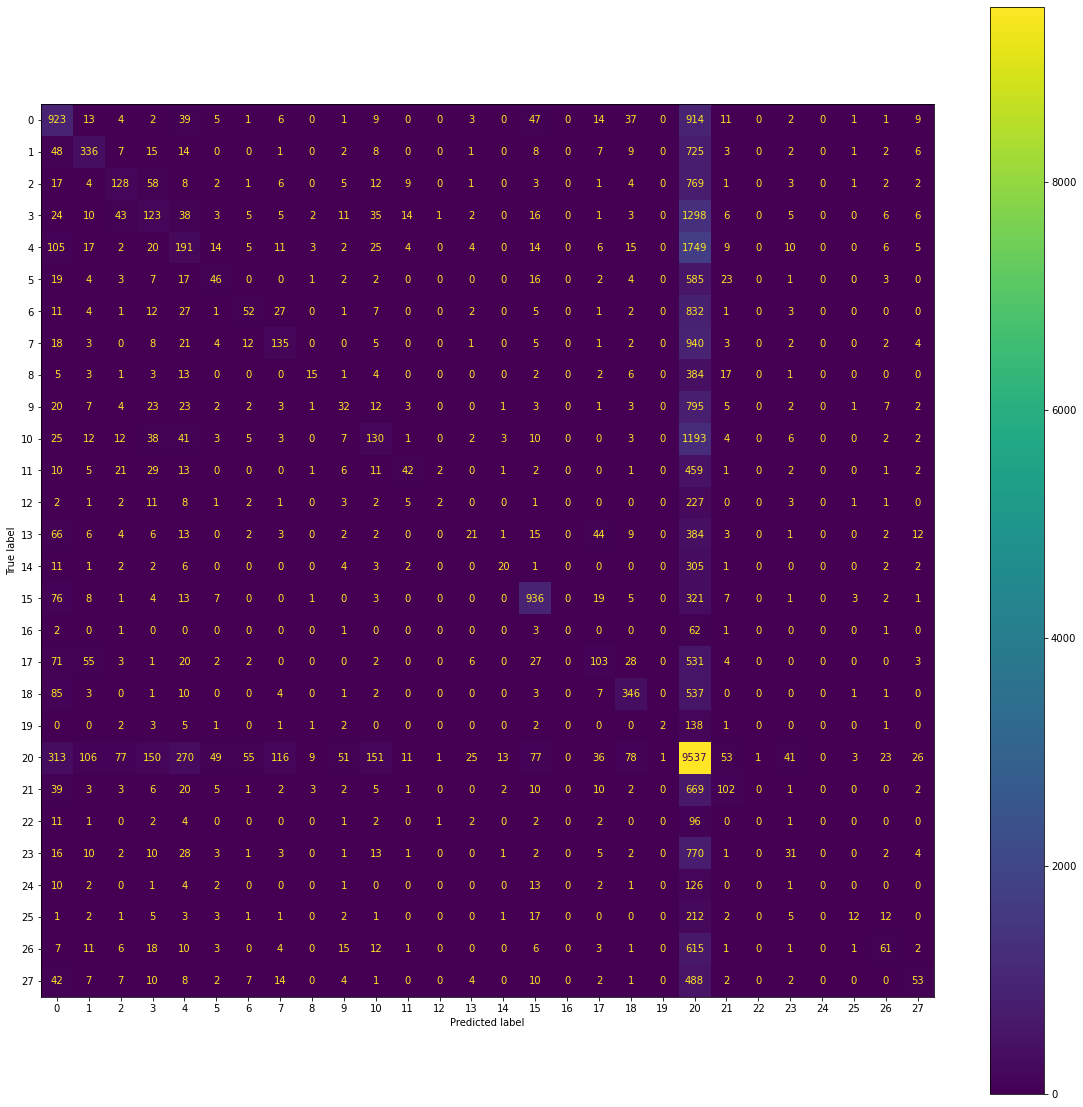

In [5]:
MNB = MultinomialNB()

#for emotions classification
MNBmodel = MNB.fit(X_train, Yemo_train)
pred = MNB.predict(X_test)

print("The performance of Multinomial naive bayes classifier with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 


The performance of naive bayes classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.41      0.24      0.30      3725
           1       0.53      0.52      0.52      7681
           2       0.49      0.49      0.49     11273
           3       0.61      0.70      0.65     11685

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364



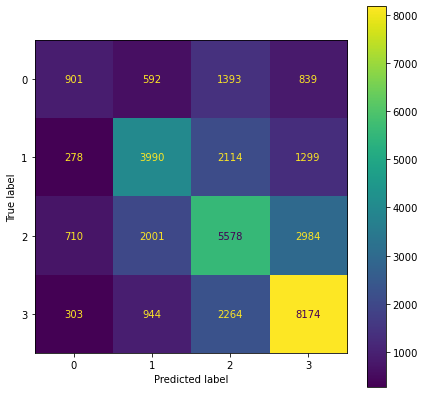

In [6]:
#for sentiments classification
MNBmodel = MNB.fit(X_train, Ysenti_train)
pred = MNB.predict(X_test)

print("The performance of naive bayes classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

## 2.3.4 Top-MNB with GridSearchCV and different parameters

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (de

The performance of naive bayes classifier with best hyper-parameters for emotions.

The best hyper-parameter value is : {'alpha': 0}

              precision    recall  f1-score   support

           0       0.46      0.49      0.48      2042
           1       0.46      0.54      0.50      1195
           2       0.27      0.31      0.29      1037
           3       0.19      0.13      0.15      1657
           4       0.22      0.15      0.18      2217
           5       0.19      0.27      0.22       735
           6       0.22      0.22      0.22       989
           7       0.29      0.29      0.29      1166
           8       0.23      0.30      0.26       457
           9       0.16      0.13      0.14       952
          10       0.23      0.21      0.22      1502
          11       0.25      0.27      0.26       609
          12       0.16      0.22      0.19       273
          13       0.17      0.17      0.17       596
          14       0.32      0.39      0.35       362
 

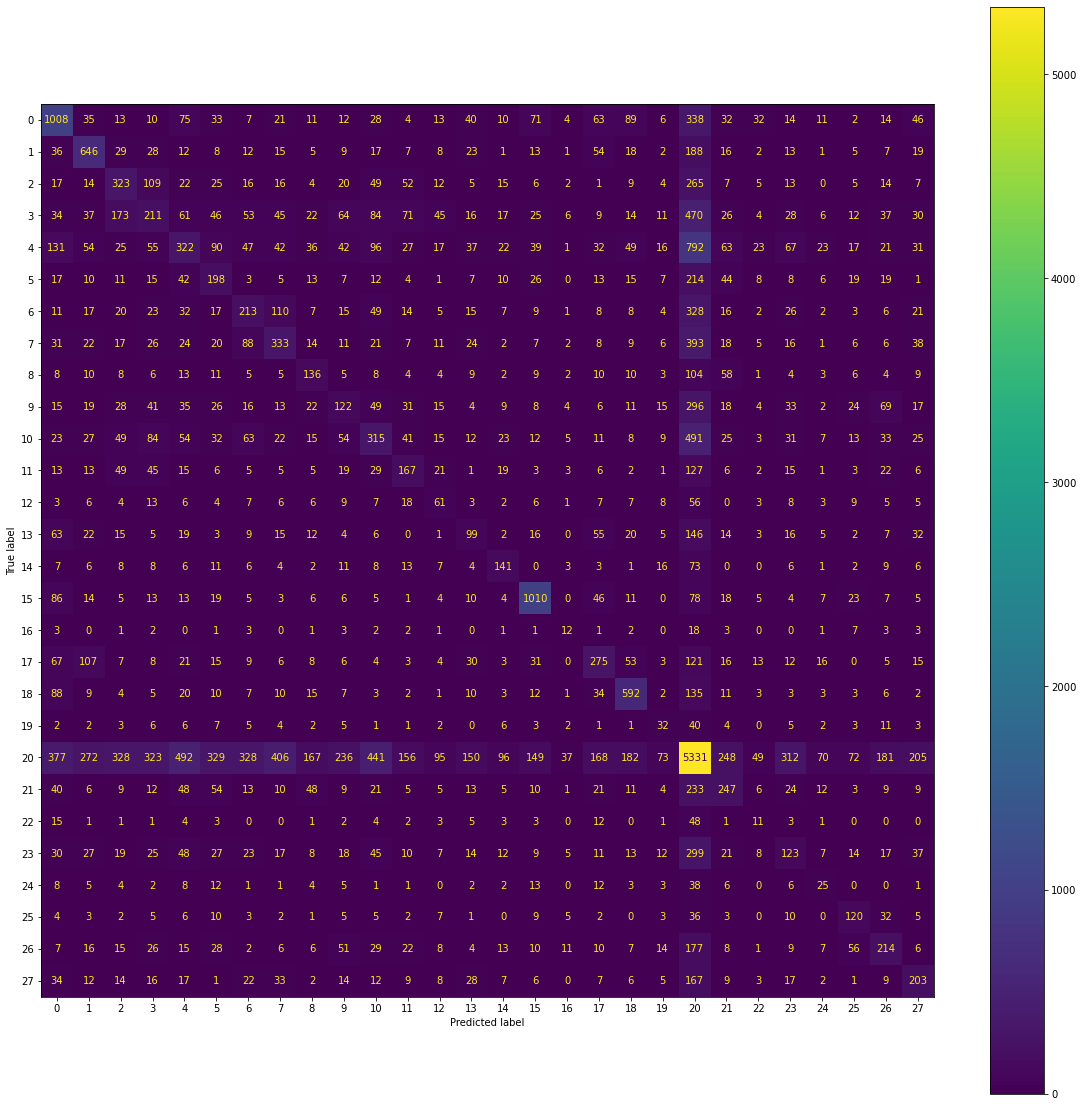

In [7]:
MNB = MultinomialNB()

#For emotions classification
parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Yemo_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for emotions.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax)


/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The performance of naive bayes classifier with best hyper-parameters for sentiments.

The best hyper-parameter value is : {'alpha': 0.5}

              precision    recall  f1-score   support

           0       0.38      0.30      0.34      3725
           1       0.53      0.53      0.53      7681
           2       0.50      0.48      0.49     11273
           3       0.62      0.69      0.66     11685

    accuracy                           0.54     34364
   macro avg       0.51      0.50      0.50     34364
weighted avg       0.53      0.54      0.54     34364



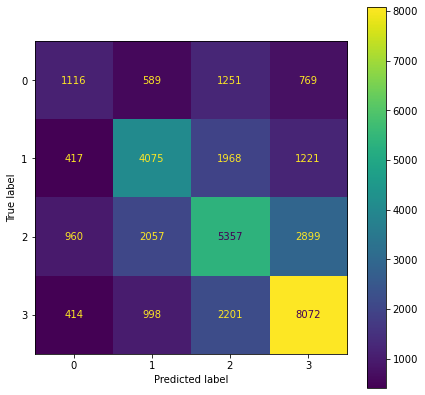

In [8]:
MNB = MultinomialNB()

#for sentiments classification
parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Ysenti_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for sentiments.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

# 2.5 Different train-test-split 
    
    We are using 50% training set and 50% test set, In this case the accuracy and other metrics would slightly change or decrease,because the test size is bigger as compared to previous section and train size is small, the downside is that, the model would not be generalized because of less training and data.

In [9]:
X_train, X_test, Yemo_train, Yemo_test, Ysenti_train, Ysenti_test = train_test_split(X, emo, senti, test_size = 0.5, train_size=0.5)

## Base-MNB: Multinomial Naive Bayes classifier

The performance of Multinomial naive bayes classifier with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.49      0.35      0.41      5259
           1       0.56      0.19      0.29      3034
           2       0.38      0.08      0.13      2535
           3       0.21      0.04      0.06      4318
           4       0.24      0.07      0.10      5594
           5       0.29      0.03      0.05      1778
           6       0.26      0.02      0.04      2518
           7       0.38      0.04      0.08      3011
           8       0.50      0.01      0.03      1077
           9       0.24      0.02      0.04      2340
          10       0.20      0.04      0.07      3815
          11       0.42      0.04      0.07      1443
          12       0.25      0.00      0.01       741
          13       0.32      0.02      0.03      1538
          14       0.32      0.01      0.02       883
          15       0.78      0.59      0.6

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

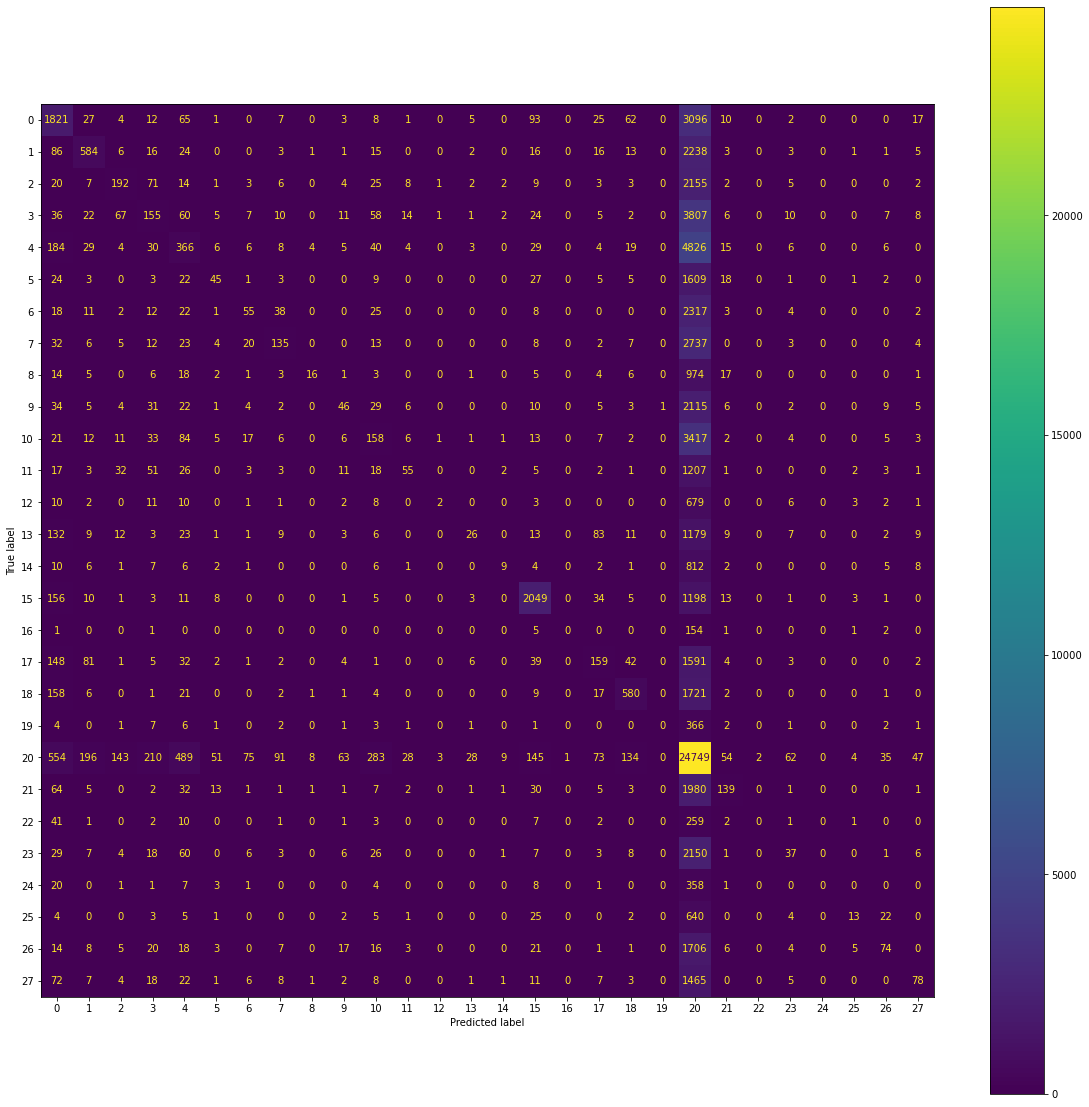

In [10]:
MNB = MultinomialNB()

#for emotions classification
MNBmodel = MNB.fit(X_train, Yemo_train)
pred = MNB.predict(X_test)

print("The performance of Multinomial naive bayes classifier with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

The performance of naive bayes classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.43      0.18      0.25      9622
           1       0.53      0.49      0.51     19296
           2       0.47      0.51      0.48     27537
           3       0.61      0.70      0.65     29455

    accuracy                           0.53     85910
   macro avg       0.51      0.47      0.47     85910
weighted avg       0.52      0.53      0.52     85910



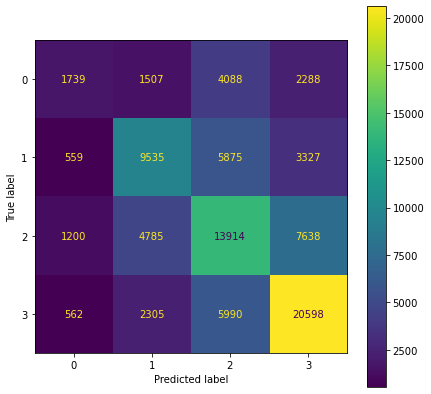

In [11]:
#for sentiments classification
MNBmodel = MNB.fit(X_train, Ysenti_train)
pred = MNB.predict(X_test)

print("The performance of naive bayes classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

## Top-MNB with GridSearchCV and different parameters

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3

The performance of naive bayes classifier with best hyper-parameters for emotions.

The best hyper-parameter value is : {'alpha': 0}

              precision    recall  f1-score   support

           0       0.44      0.44      0.44      5259
           1       0.44      0.47      0.46      3034
           2       0.25      0.27      0.26      2535
           3       0.17      0.13      0.15      4318
           4       0.19      0.15      0.17      5594
           5       0.19      0.24      0.21      1778
           6       0.20      0.19      0.20      2518
           7       0.27      0.23      0.25      3011
           8       0.21      0.24      0.22      1077
           9       0.15      0.13      0.14      2340
          10       0.18      0.16      0.17      3815
          11       0.19      0.21      0.20      1443
          12       0.16      0.17      0.17       741
          13       0.17      0.15      0.16      1538
          14       0.29      0.32      0.31       883
 

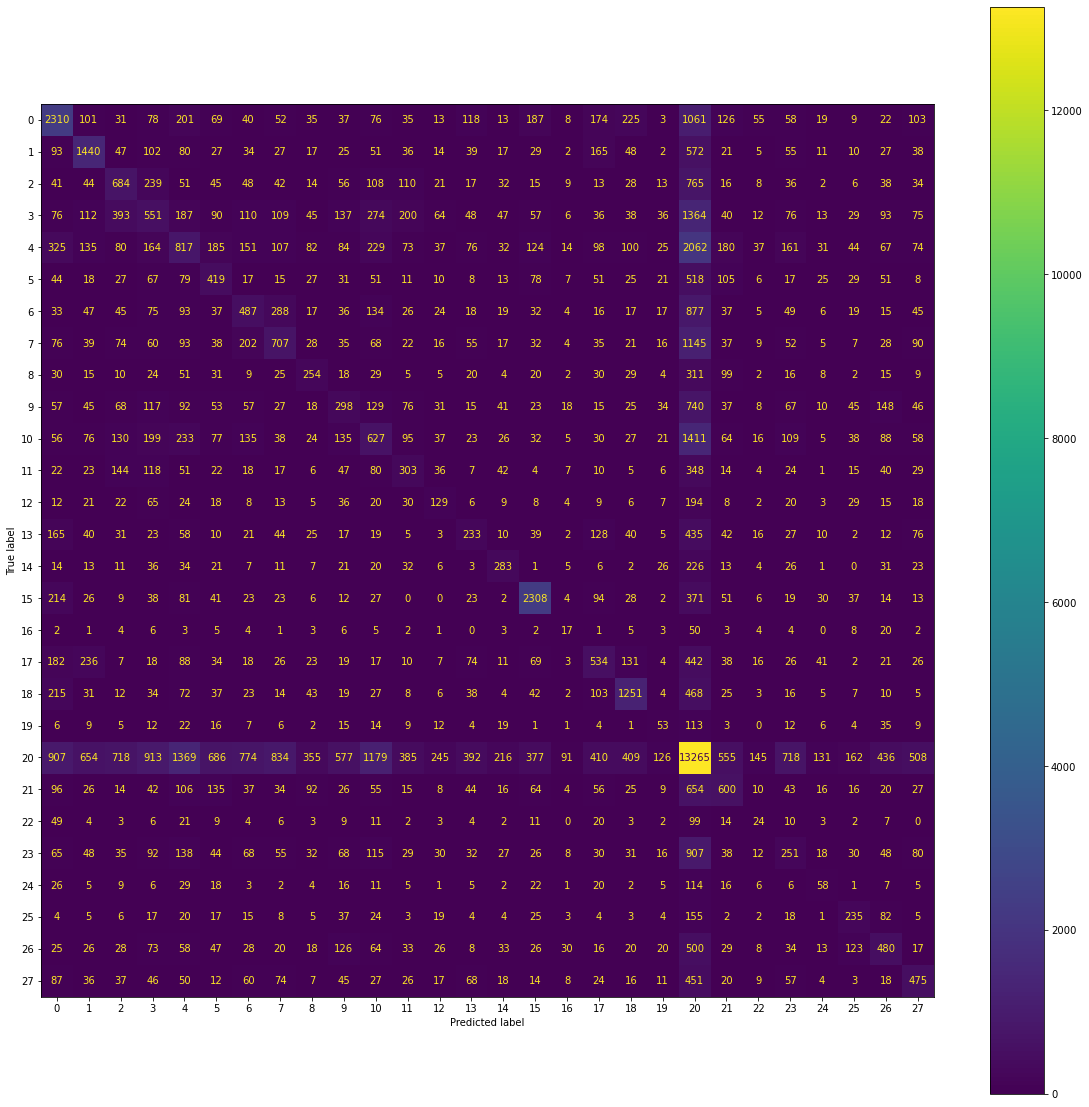

In [12]:
MNB = MultinomialNB()

parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Yemo_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for emotions.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax)

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The performance of naive bayes classifier with best hyper-parameters for sentiments.

The best hyper-parameter value is : {'alpha': 0.5}

              precision    recall  f1-score   support

           0       0.40      0.26      0.31      9622
           1       0.52      0.51      0.52     19296
           2       0.47      0.48      0.47     27537
           3       0.62      0.69      0.65     29455

    accuracy                           0.53     85910
   macro avg       0.50      0.48      0.49     85910
weighted avg       0.52      0.53      0.53     85910



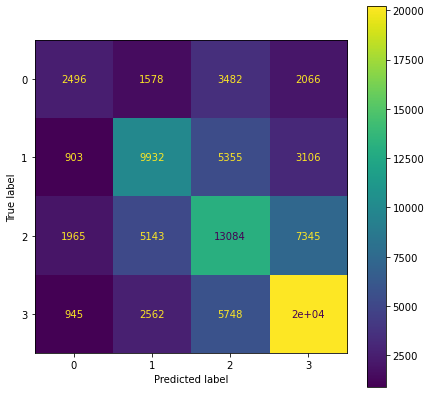

In [13]:
#for sentiments classification
parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Ysenti_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for sentiments.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

# 3. Embeddings as Features

## 3.1 Genism.downloader.load

In [14]:
model = gensim.downloader.load("word2vec-google-news-300")

## 3.2 Tokenizer from nltk

    As it is mentioned that we have to display number of tokens in the training set, we again change the size of the training set to 80% (previously we changed it to 50% for section 2.5)

In [46]:
posts = str(posts)
regex = RegexpTokenizer('[a-zA-Z]+')
tokens = capword_tokenizer.tokenize(posts)

In [49]:
Xemb_train, Xemb_test = train_test_split(tokens, test_size = 0.2, train_size=0.8)
print("There are "+str(len(Xemb_train))+" tokens in the training set.")

There are 1790225 tokens in the training set.


## 3.3 Embedding of reddit posts
    
    